In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tools import get_Tapes

In [2]:
df = pd.read_csv("Clean_Day_0_data.csv", index_col=0, parse_dates=True)
df = df.sort_index()
df["P x V"] = df["Volume"] * df["Real Price"]
df.head()

,Volume,Real Price,Incoming bid,Incoming ask,Outgoing bid,Outgoing ask,P x V
combined_time,,,,,,,
2025-01-02 08:00:00,NaN,NaN,[1 6],NaN,NaN,NaN,NaN
2025-01-02 08:00:01,NaN,NaN,[261 1],[800 1][799 1][798 1][797 1],NaN,[800 1][799 1][798 1],NaN
2025-01-02 08:00:02,NaN,NaN,[262 6],[338 3][297 5],[1 6],NaN,NaN
2025-01-02 08:00:03,NaN,NaN,[263 6][264 6],[296 1][309 3][334 4][292 5][291 1][296 4],[262 6][263 6],[338 3][297 5][797 1][296 1] [309 3],NaN
2025-01-02 08:00:04,NaN,NaN,NaN,[288 5][307 4][287 1] [296 3][287 4][300 4][28...,NaN,[292 5][334 4][296 4][287 1] [296 3][307 4][29...,NaN


Number of null values 0


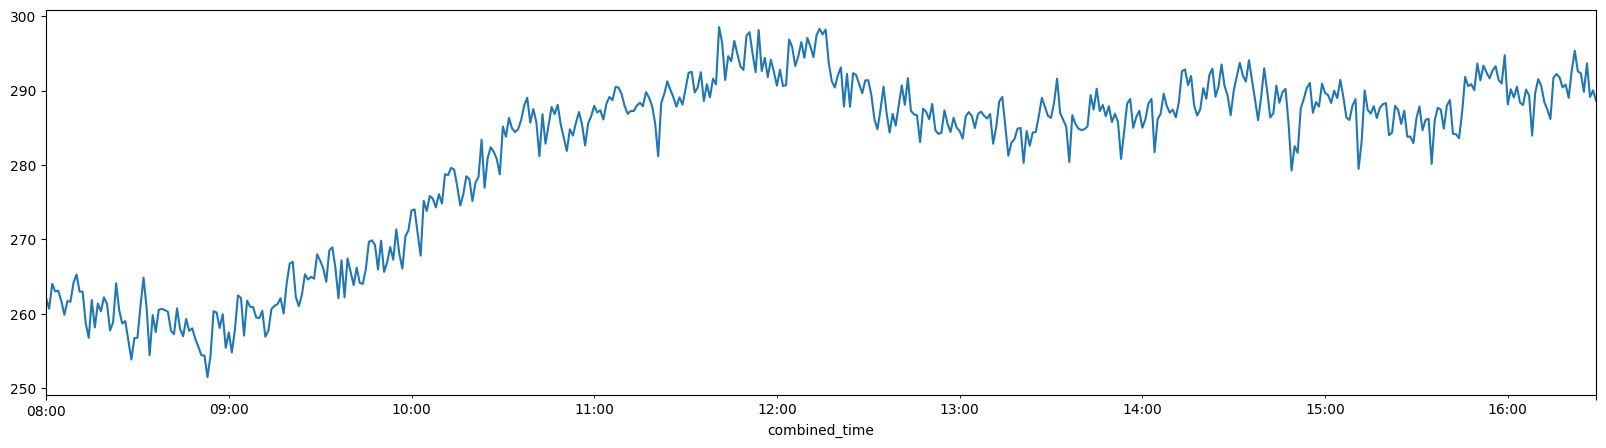

In [39]:
X_seconds = 60 / 1 # change this as you please
plt.figure(figsize=(20,5))
df_resampled = df.resample(f'{X_seconds}s').sum() 
df_resampled["Price"] = df_resampled["P x V"] / df_resampled["Volume"]
df_resampled["Price"].plot()
print("Number of null values", df_resampled["Price"].isna().sum())

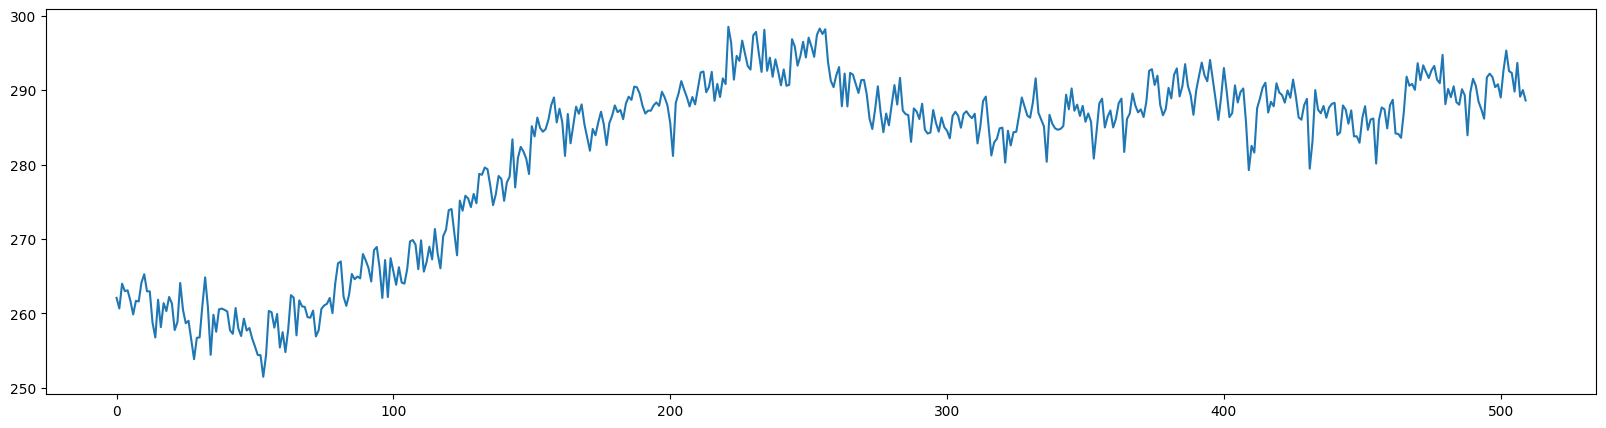

In [40]:
sample = df_resampled["Price"].to_numpy()[:] # messing around with various samples shows nothing significant
plt.figure(figsize=(20,5))
plt.plot(np.arange(len(sample)),sample)

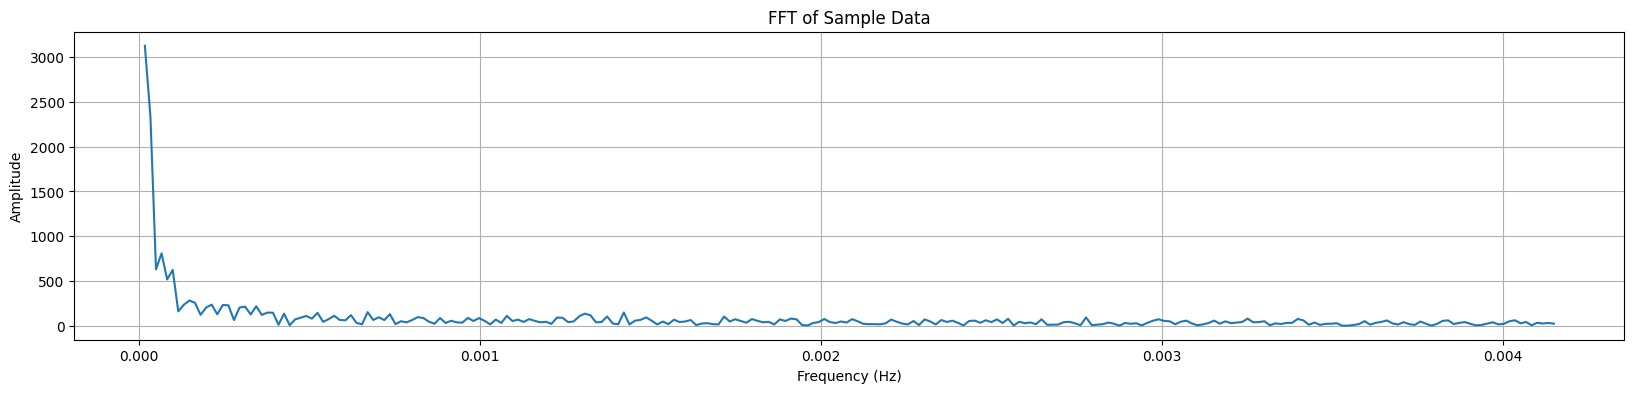

In [41]:
fft_result = np.fft.fft(sample)
frequencies = np.fft.fftfreq(len(fft_result))

sample_rate = 1/X_seconds

pos_mask = frequencies > 0

# Plot the results
plt.figure(figsize=(20, 4))
plt.plot(frequencies[pos_mask]*(sample_rate/2), np.abs(fft_result[pos_mask]))
plt.title('FFT of Sample Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

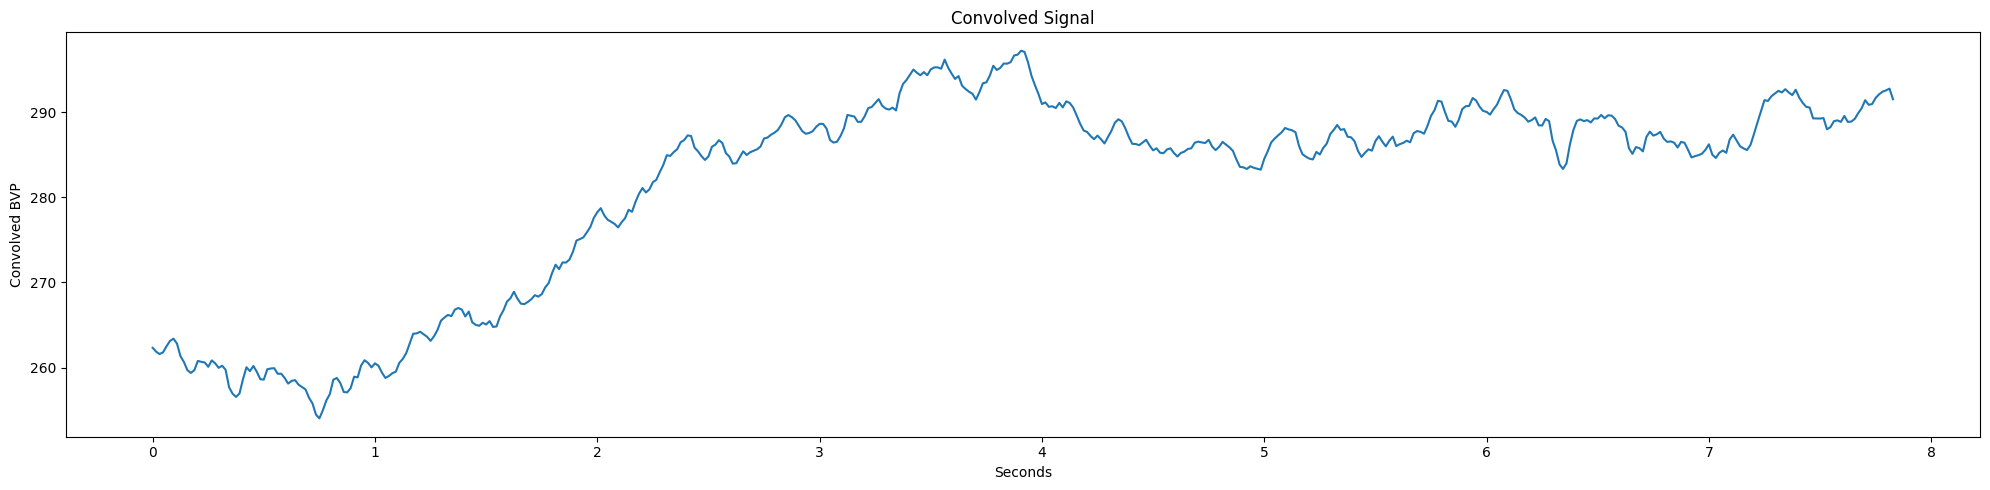

In [42]:
# Define a convolution kernel
k_size = 5
kernel = np.ones(k_size) / k_size # Example kernel, you can adjust this

# Apply convolution
convolution_result = np.convolve(sample, kernel, mode='same')
convolution_result = convolution_result[k_size-1:len(convolution_result)-(k_size-1)]

# Plot the original and convolved signals
plt.figure(figsize=(20, 5))

plt.plot(np.arange(len(convolution_result)) / 64, convolution_result)
plt.xlabel("Seconds")
plt.ylabel("Convolved BVP")
plt.title('Convolved Signal')

plt.tight_layout()
plt.show()

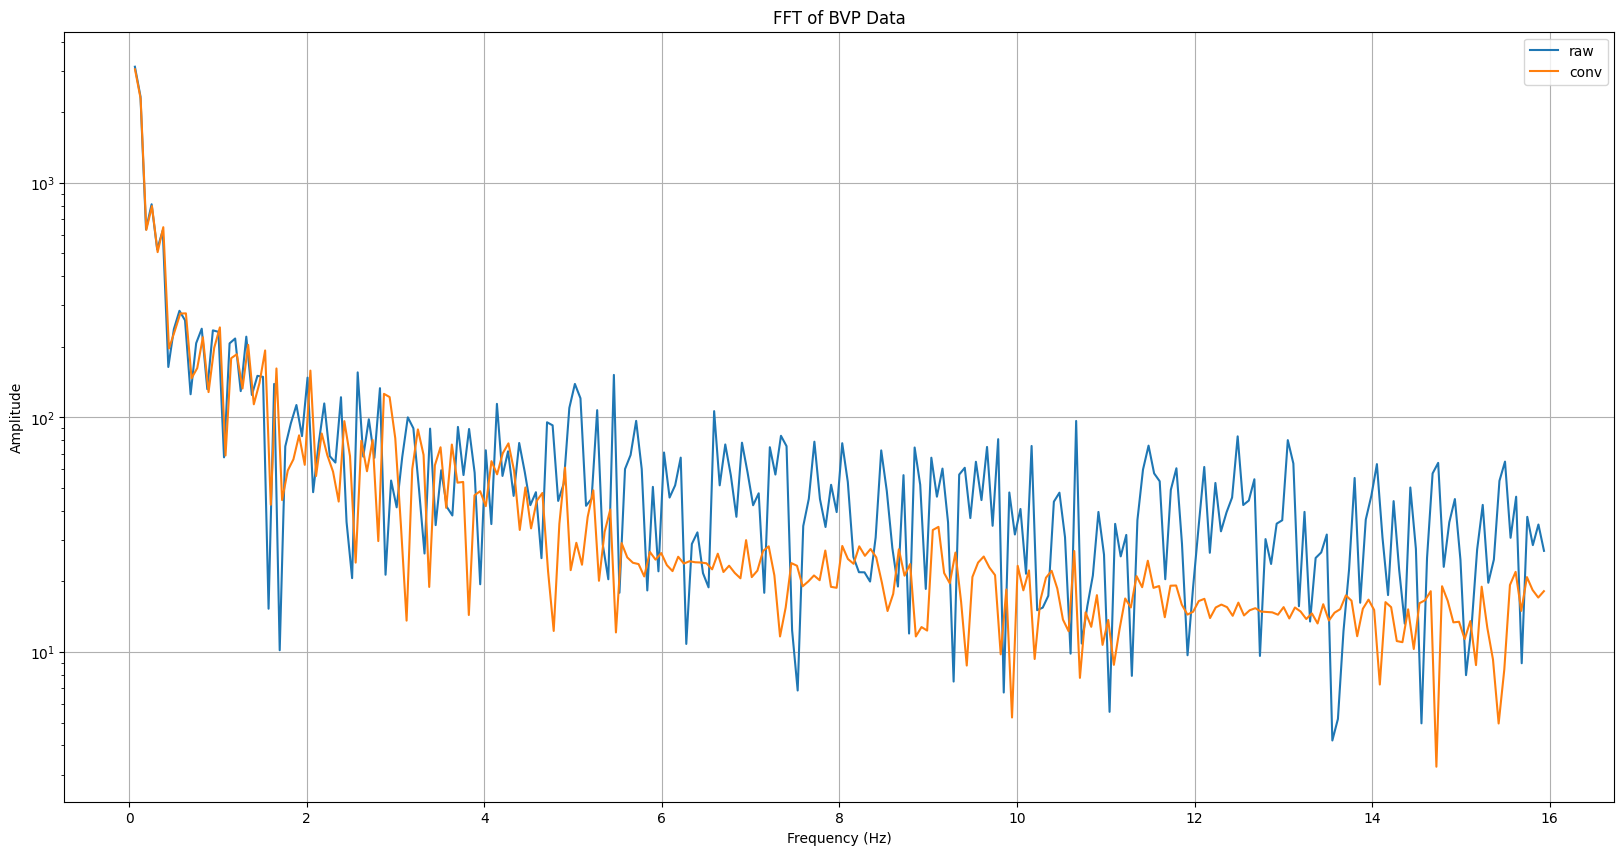

In [43]:
fft_result2 = np.fft.fft(convolution_result)
frequencies2 = np.fft.fftfreq(len(fft_result2))

pos_mask2 = frequencies2 > 0

# Plot the results
plt.figure(figsize=(20, 10))
plt.plot(frequencies[pos_mask]*32, np.abs(fft_result[pos_mask]), label="raw")
plt.plot(frequencies2[pos_mask2]*32, np.abs(fft_result2[pos_mask2]), label="conv")
plt.title('FFT of BVP Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.yscale("log")
#plt.xlim(0,2)
plt.grid(True)
plt.legend()
plt.show()